In [36]:
# import stuff
import numpy as np
import pandas as pd
import uproot as ur
import math
from matplotlib import pyplot as plt

In [37]:
# get tree
file = ur.open("small.root")
file.allkeys()

[b'worldTree;31', b'worldTree;30']

In [38]:
# get branch
tree = ur.open("small.root")["worldTree"]
tree.allkeys()

[b'eve.',
 b'eve.run_',
 b'eve.lumi_',
 b'eve.evt_',
 b'eve.lepton_pt_',
 b'eve.lepton_eta_',
 b'eve.lepton_phi_',
 b'eve.lepton_e_']

In [39]:
# get branches as arrays
leptPt = ur.open("small.root")["worldTree"]["eve.lepton_pt_"]
leptPt = leptPt.array() # for some reason the leadV function freaks when this is done in one line
leptEta = ur.open("small.root")["worldTree"]["eve.lepton_eta_"]
leptEta = leptEta.array()
leptPhi = ur.open("small.root")["worldTree"]["eve.lepton_phi_"]
leptPhi = leptPhi.array()
leptE = ur.open("small.root")["worldTree"]["eve.lepton_e_"]
leptE = leptE.array()

In [40]:
# get indices of leading values
def leadInd(_array):
    indLead = []
    for x in _array:
        if(len(x)>1):
            indLead.append(np.where(x==max(x)))
        else:
            indLead.append(0) # add an index of zero to the array bc it'll be irrelevant later anyway
    return indLead

In [41]:
# get indices of leading values
leadIs = leadInd(leptPt)
len(leadIs)

88850

In [42]:
# defines function to get leading values of jagged array from array of leading indices
def leadVals(_array,_indexArray):
    arrLead = []
    ifCount = 0;
    elseCount = 0;
    i = 0;
    for x in _array:
        if(len(x)>1):
            ifCount +=1
            arrLead.append(x[_indexArray[i]])
            i+=1
        else: 
            elseCount +=1
            arrLead.append(x)
            i+=1
    print("if, else, sum: ", ifCount, ", ",elseCount, ", ", ifCount+elseCount)
    return arrLead

In [43]:
# get array of leading values
leadPt = leadVals(leptPt, leadIs)
leadEta = leadVals(leptEta, leadIs)
leadPhi = leadVals(leptPhi, leadIs)
leadE = leadVals(leptE, leadIs)
print("Number of values in each of Pt: ", len(leadPt), ", Eta: ", len(leadEta), ", Phi: ", len(leadPhi), ", E: ", len(leadE))

if, else, sum:  46817 ,  42033 ,  88850
if, else, sum:  46817 ,  42033 ,  88850
if, else, sum:  46817 ,  42033 ,  88850
if, else, sum:  46817 ,  42033 ,  88850
Number of values in each of Pt:  88850 , Eta:  88850 , Phi:  88850 , E:  88850


In [44]:
# defines function to return array of tuples of Ptx and Pty
def ptXY(_ptArr, _phiArr):
    compArr = []
    i = 0;
    for x in _ptArr:
        pt = x
        phi = _phiArr[i]
        ptx = np.cos(phi)*pt
        pty = np.sin(phi)*pt
        compArr.append((ptx,pty))
    return compArr


In [45]:
# get array of types of ptx and pty
comps = ptXY(leadPt, leadPhi)
len(comps)

88850

In [46]:
#define function to find pz from pt and eta
def pzPtEta(_pt, _eta):
    pz = _pt*np.sinh(_eta)
    return pz
#define function to get array of (x, y, z) tuples from xyComps and pzArr
def ptXYZ(_ptArr, _phiArr, _etaArr): #where _xyComps is an array of (x, y) tuples
# make array of tuples (px, py, pz)
    compArr = []
    for pt, phi, eta in zip(_ptArr, _phiArr, _etaArr):
        px = np.cos(phi)*pt
        py = np.sin(phi)*pt
        pz = pzPtEta(pt, eta)
        compArr.append((px, py, pz))
    return compArr

In [47]:
# get array of types of ptx and pty
xyComps = []
xyComps = ptXY(leadPt, leadPhi)
print("number of (x,y) tuples: ", len(xyComps))

# print (x,y)
for i in range(5):
    print(xyComps[i])

number of (x,y) tuples:  88850
(array([-19.5172343]), array([65.36079359]))
(array([-20.54256833]), array([68.79450991]))
(array([-35.58816387]), array([119.18034071]))
(array([-22.60863274]), array([75.71350302]))
(array([-27.92800722]), array([93.52742746]))


In [48]:
# define function to get the magnitude of a vector from a three-tuple of its components
def vMag(_x, _y, _z):
    vm = np.sqrt((_x**2)+(_y**2)+(_z**2))
    return vm

def pVals(_xyzCompArray):
    pArr = []
    for e in _xyzCompArray:
        p = vMag(e[0], e[1], e[2])
        pArr.append(p)
    return pArr


In [53]:

xyzPComps = ptXYZ(leadPt, leadPhi, leadEta)

print("THE FOLLOWING IS RIGHT IF THE X AND Y VALUES MATCH THE ONES FROM ptXY!!")
# print (x,y,z)
for i in range(5):
    print(xyzPComps[i])
    
print(vMag(xyzPComps[0][0],xyzPComps[0][1], xyzPComps[0][2]))
    
leadP = []
leadP = pVals(xyzPComps)

for i in range(5):
    print(leadP[i])

## End of finding momentum 
##########################


THE FOLLOWING IS RIGHT IF THE X AND Y VALUES MATCH THE ONES FROM ptXY!!
(array([-19.5172343]), array([65.36079359]), array([42.07567028]))
(array([70.04843035]), array([15.74481223]), array([-51.27474897]))
(array([-103.96579839]), array([-68.27579209]), array([-434.94135177]))
(array([-65.09672919]), array([-44.78951509]), array([22.67903078]))
(array([-68.0117326]), array([-70.01255247]), array([-239.06953713]))
[80.14560376]
[80.14560376]
[88.22574221]
[452.37644778]
[82.20719707]
[258.22780032]


ValueError: setting an array element with a sequence.

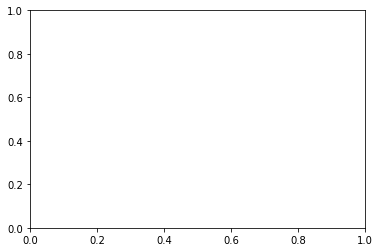

In [57]:
## PLOT BREAK!!!
#ptArray = tree["eve.lepton_pt_"].array()
#myList = []
#for x in ptArray:
#    for y in x:
#        if y < 300:
#            myList.append(y)

#print(len(myList))
#plt.hist(myList, bins=100)
ptList = []
pList = []
for j in leadPt:
    ptList.append(j)
for k in leadP:
    pList.append(k)
plt.plot(ptList, pList)

In [51]:
# Okay now back to business 